<a href="https://colab.research.google.com/github/eduardoalsilva/exploracao-mercado-financeiro/blob/main/exploracao_mercado_financeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Análise Exploratória do Mercado Financeiro

### Objetivo
Este notebook realiza uma análise exploratória de dados do mercado financeiro, utilizando dados históricos de ações para identificar padrões de comportamento

## 1. Coletando os Dados
Usamos a biblioteca 'yfinance' para baixar dados históricos de algumas ações do mercado financeiro

In [2]:
# Escolha dos ativos e período
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
start_date = '2023-01-01'
end_date = '2024-03-01'

In [9]:
# Baixar os dados do Yahoo Finance
df = yf.download(tickers, start=start_date, end=end_date)['Close']

[*********************100%***********************]  4 of 4 completed


In [21]:
# Exibir as primeiras linhas dos dados
df.head()

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2023-01-03,123.632523,85.820000,88.798103,235.240021
2023-01-04,124.907700,85.139999,87.761856,224.949890
2023-01-05,123.583099,83.120003,85.888641,218.282867
2023-01-06,128.130219,86.080002,87.024521,220.855408
2023-01-09,128.654144,87.360001,87.702065,223.005722


## 2. Processamento dos Dados
Vamos calcular os retornos diários das ações e remover valores nulos

In [11]:
# Calcular retornos diários
df_returns = df.pct_change().dropna()

In [13]:
# Estatísticas básicas
df_returns.describe()

Ticker,AAPL,AMZN,GOOGL,MSFT
count,290.000000,290.000000,290.000000,290.000000
mean,0.001372,0.002703,0.001701,0.002038
std,0.012524,0.020495,0.019005,0.015278
min,-0.048020,-0.084315,-0.095094,-0.043743
25%,-0.006398,-0.009461,-0.008944,-0.007066
50%,0.000941,0.001132,0.001889,0.001624
75%,0.008590,0.015285,0.011434,0.011278
max,0.046927,0.082693,0.072787,0.072435


## 3. Visualização dos Dados

### Evolução dos preços das ações

<Figure size 1200x600 with 0 Axes>

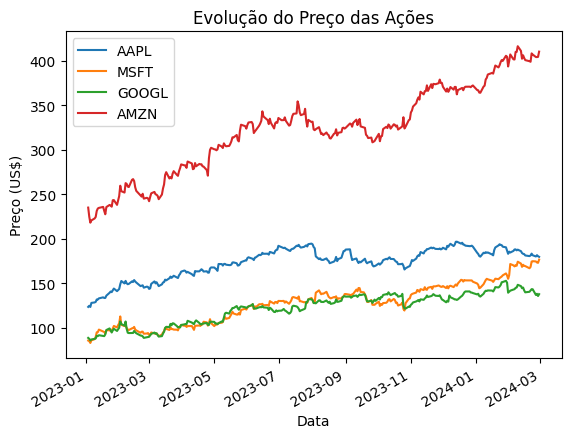

In [22]:
plt.figure(figsize=(12, 6))
df.plot(title='Evolução do Preço das Ações')
plt.xlabel('Data')
plt.ylabel('Preço (US$)')
plt.legend(tickers)
plt.show()

### Distribuição dos retornos diários

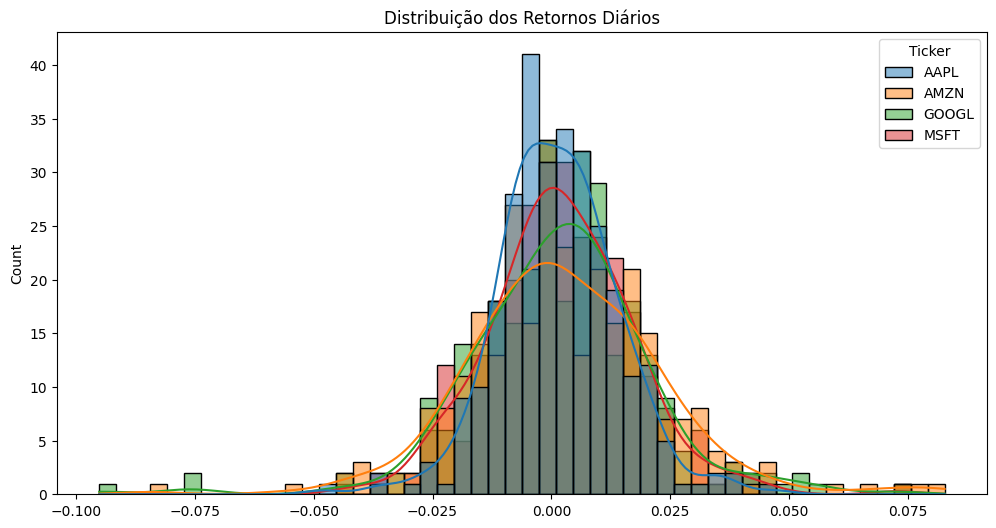

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(df_returns, bins=50, kde=True)
plt.title('Distribuição dos Retornos Diários')
plt.show()

### Matriz de correlação entre os ativos

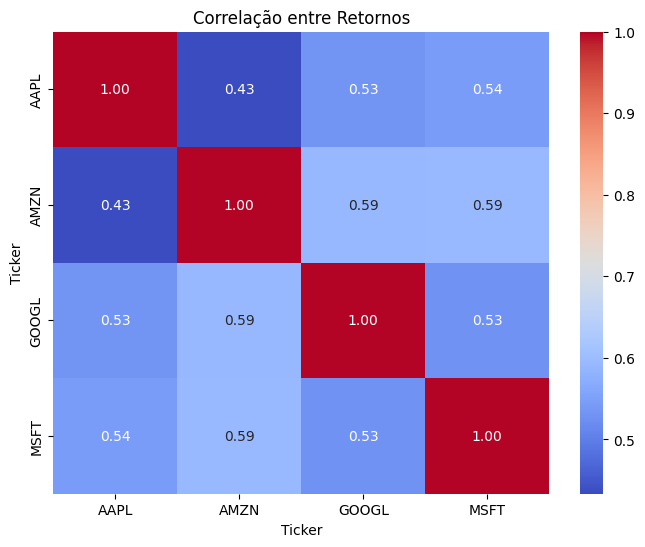

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_returns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Retornos')
plt.show()

## 4. Conclusão
Após a análise exploratória, podemos observar padrões de comportamento no mercado financeiro, como períodos de maior volatilidade e correlação entre ativos. Esse tipo de análise pode ajudar investidores a tomar deciões mais informadas.